In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('datasets/cars_processed.csv')
df.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,18.000000,8,307.0,130,3504,12.0,US,51
1,16.000000,8,304.0,150,3433,12.0,US,51
2,17.000000,8,302.0,140,3449,10.5,US,51
3,14.000000,8,454.0,220,4354,9.0,US,51
4,23.551429,8,440.0,215,4312,8.5,US,51
5,14.000000,8,455.0,225,4425,8.5,US,51
6,15.000000,8,390.0,190,3850,8.5,US,51
7,15.000000,8,383.0,170,3563,10.0,US,51
8,14.000000,5,340.0,160,3609,8.0,US,51
9,23.551429,8,400.0,150,3761,9.5,US,51


In [3]:
X = df.drop(columns=['MPG', 'Origin'])
y = df['MPG']

In [4]:
from sklearn.linear_model import Lasso

In [5]:
lasso = Lasso(alpha=0.8)
lasso.fit(X, y)

Lasso(alpha=0.8, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

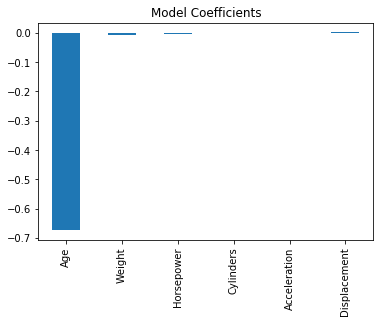

In [6]:
predictors = X.columns

coef = pd.Series(lasso.coef_, predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

In [7]:
lasso_features = ['Age', 'Weight']
X[lasso_features].head(10)

,Age,Weight
0,51,3504
1,51,3433
2,51,3449
3,51,4354
4,51,4312
5,51,4425
6,51,3850
7,51,3563
8,51,3609
9,51,3761


In [8]:
from sklearn.tree import DecisionTreeRegressor

In [9]:
dt = DecisionTreeRegressor(max_depth=4)
dt.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [10]:
predictors = X.columns
coef = pd.Series(dt.feature_importances_, predictors).sort_values()
print(coef)

Cylinders       0.000000
Acceleration    0.006328
Weight          0.058285
Age             0.112716
Horsepower      0.177081
Displacement    0.645590
dtype: float64


In [11]:
dt_features = ['Displacement', 'Horsepower']
X[dt_features].head(10)

,Displacement,Horsepower
0,307.0,130
1,304.0,150
2,302.0,140
3,454.0,220
4,440.0,215
5,455.0,225
6,390.0,190
7,383.0,170
8,340.0,160
9,400.0,150


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [13]:
def build_model(X, y, test_frac=0.2):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_frac)
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'R^2: {r2_score(y_test, y_pred):.2f}')

In [14]:
build_model(X, y)
build_model(X[lasso_features], y)
build_model(X[dt_features], y)

R^2: 0.80
R^2: 0.82
R^2: 0.67
